# Extract Captions from txt files and contert them into a json file

In [222]:
def extract_index_caption(txtfile):
    caption = []
    list_caption_dict = []
    with open(txtfile)as f:
        for line in f:
            if 'meta name="resourceName"' in line:
                caption.append(line.rstrip("\n"))
            if '<body'in line:
                caption.append(line.rstrip("\n")) 
    index_list = caption[::2]
    caption_list = caption[1::2]
    zip_list = zip(index_list,caption_list)
    index_caption = list(zip_list)
    for i in index_caption:
        caption_dict = {}
        index = i[0].split()[2].strip('"/>').lstrip('content="')
        caption=" ".join(i[1].split()[4:][:-3])
        caption_dict[index] = caption
        list_caption_dict.append(caption_dict)
    return list_caption_dict

In [223]:
def dict_to_json(txtfile):
    filename = txtfile.strip(".txt")
    caption_dict = extract_index_caption(txtfile)
    with open(filename+"_captions.json","w") as file:
        json.dump(caption_dict,file)

In [224]:
dict_to_json("models_credencial_phishing.txt")

In [225]:
dict_to_json("models_reconnaissance.txt")

In [226]:
dict_to_json("models_malware.txt")

In [227]:
dict_to_json("models_social_engineering.txt")

# Extract the last 200 image captions from each category and append them to tsv file

In [279]:
def extract_last_800_captions(json_file):
    last_800_captions = []
    with open(json_file)as f:
        file = json.load(f)
    for i in file:
        order = (int(list(i.keys())[0].split("-")[1].strip(".png")))
        if order >=3801 and order <= 4000:
            last_800_captions.append(list(i.values())[0])
    return last_800_captions

In [280]:
captions_1 = extract_last_800_captions("models_credencial_phishing_captions.json")
captions_2=extract_last_800_captions("models_social_engineering_captions.json")
captions_3=extract_last_800_captions("models_malware_captions.json")
captions_4=extract_last_800_captions("models_reconnaissance_captions.json")

In [296]:
caption = captions_1+captions_3+captions_4+captions_2

In [288]:
captions = pd.DataFrame({"Phish_Irish_Captions":caption})

In [260]:
# df_1= pd.DataFrame({"credential_phishing_captions":captions_1})
# df_2=pd.DataFrame({"social_engineering_captions":captions_2})
# df_3=pd.DataFrame({"malware_captions":captions_3})
# df_4=pd.DataFrame({"reconnaissance_captions":captions_4})

In [271]:
import pandas as pd
df_tsv = pd.read_csv("~/DSCI-550-Assignment-2/data/additional-features-v2/new/assignment2.tsv", sep = '\t')

In [274]:
df_tsv["category"].unique()

array(['Credential_phishing', 'Malware', 'Reconnaissance',
       'Social_engineering'], dtype=object)

In [270]:
df_tsv

,Unnamed: 0,content,reply #,category,index
0,0,When the release date for the project was anno...,0,Credential_phishing,0
1,1,"In the course of my search, I discovered a lar...",0,Credential_phishing,1
2,2,Frequently Asked Questions\n\nQ: Can I get a 1...,0,Credential_phishing,10
3,3,"Dear Sir/Madam,\n\nI am writing you because yo...",0,Credential_phishing,100
4,4,- Free phone and fax service.\n- All telephone...,0,Credential_phishing,101
...,...,...,...,...,...
3195,3195,YoI can't understand what you mean by that mea...,3,Social_engineering,95
3196,3196,"To whom may concern, F**k you! to find a way t...",3,Social_engineering,96
3197,3197,YoCall me at 911.\n(CEM)\n\n(CEM)\n\n(CEM)\n\n...,3,Social_engineering,97
3198,3198,"Hello, You wanted my SSN, here is my birthday,...",3,Social_engineering,98


In [292]:
new = pd.concat([df_tsv,captions],axis=1)

In [354]:
new.head(801)

,Unnamed: 0,content,reply #,category,index,Phish_Irish_Captions
0,0,When the release date for the project was anno...,0,Credential_phishing,0,a black and white photo of a snow covered moun...
1,1,"In the course of my search, I discovered a lar...",0,Credential_phishing,1,a black and white photo of a pair of scissors .
2,2,Frequently Asked Questions\n\nQ: Can I get a 1...,0,Credential_phishing,10,a pair of skis sitting on top of a snow covere...
3,3,"Dear Sir/Madam,\n\nI am writing you because yo...",0,Credential_phishing,100,a black and white photo of a snow skier
4,4,- Free phone and fax service.\n- All telephone...,0,Credential_phishing,101,a black and white photo of a snow board
...,...,...,...,...,...,...
796,796,"Following a successful search, the owner of th...",0,Social_engineering,96,a living room with a couch and a table
797,797,18.5\n\n11.6%\n\n11.1%\n\n10.8%\n\n9.7%\n\n8.8...,0,Social_engineering,97,a bunch of different colored vases on a table .
798,798,The EU is ready to introduce a law that will p...,0,Social_engineering,98,a group of three vases sitting on top of a tab...
799,799,The only thing that is known to me so far abou...,0,Social_engineering,99,a room with a couch and a table


# Calculate the common words for every catetory's captions

In [300]:
import matplotlib.pyplot as plt
import pandas as pd

In [328]:
with open("models_credencial_phishing_captions.json")as f:
    f1 = json.load(f)
with open("models_malware_captions.json")as f:
    f2=json.load(f)
with open("models_reconnaissance_captions.json")as f:
    f3=json.load(f)
with open("models_social_engineering_captions.json")as f:
    f4=json.load(f)

In [329]:
def word_count(file):
    caption={}
    for i in range(len(file)):
        values = list(file[i].values())[0].split()
        for j in values:
            if j == "a" or j == 'the' or j == '.' or j == 'of' or j == 'and' or j =='in' or j =='on' or j =='with' or j =='up' or j=="top":
                pass
            else:
                caption[j]=caption.get(j,1)+1
    return caption

In [330]:
def word_count_df(file):
    wc_dict=word_count(file)
    return pd.DataFrame(wc_dict.items(),columns = ['word','count']).sort_values(by='count',ascending=False).head(10)

In [351]:
def wc_graph(file,color):
    word_frequency = word_count_df(file)
    fig, ax = plt.subplots(figsize=(8, 8))
    word_frequency.sort_values(by='count').plot.barh(x='word',y='count',ax=ax,color=color)
    ax.set_title("Common Words Found")
    plt.show()

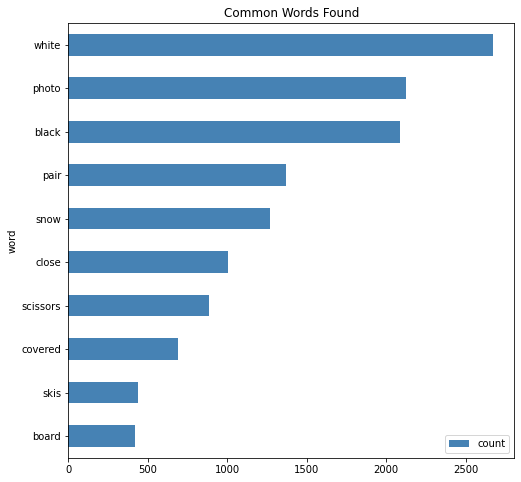

In [352]:
wc_graph(f1,"steelblue")

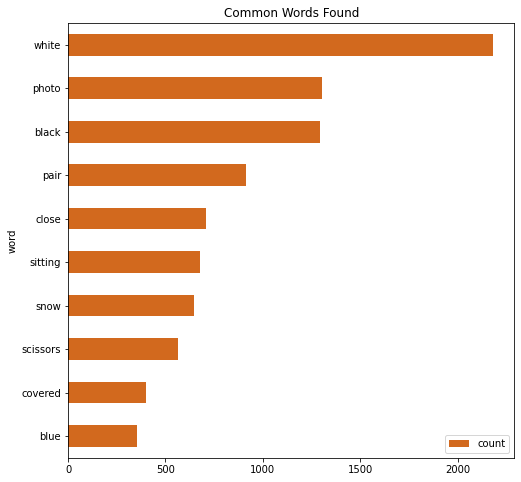

In [346]:
wc_graph(f2,"chocolate")

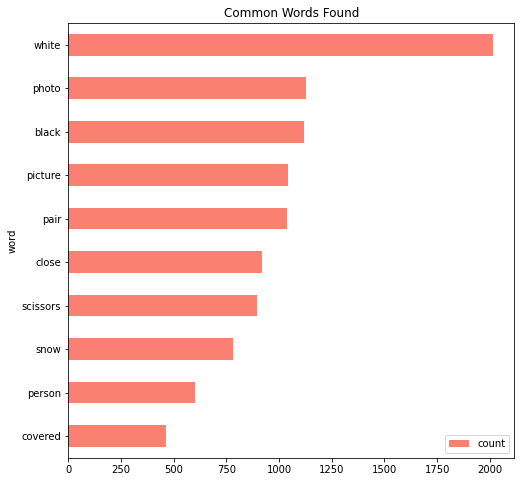

In [347]:
wc_graph(f3,"salmon")

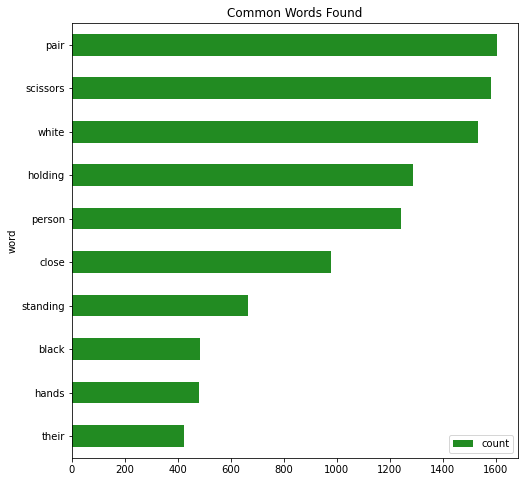

In [348]:
wc_graph(f4,"forestgreen")

# Extract 200 phish irish images for each category and append them to tsv file

In [358]:
from PIL import Image
from numpy import asarray
import os

In [400]:
def img_array(filepath):
    img_array_list = []
    for i in os.listdir(filepath):
        try:
            order = int(i.split("-")[1].strip(".png"))
            if order >=3801 and order <= 4000:
                img = Image.open(filepath+"/"+i)
                numpydata=asarray(img)
                img_array_list.append(numpydata)
        except:
            pass
    return img_array_list

In [401]:
array_1 = img_array("/Users/naturbiz/Downloads/FakePhishIris/models_credencial_phishing/samples")

In [402]:
array_2 = img_array("/Users/naturbiz/Downloads/FakePhishIris/models_malware/samples")

In [403]:
array_3 = img_array("/Users/naturbiz/Downloads/FakePhishIris/models_reconnaissance/samples")
array_4 = img_array("/Users/naturbiz/Downloads/FakePhishIris/models_social_engineering/samples")

In [404]:
image_arrays = array_1+array_2+array_3+array_4

In [409]:
image_array_df = pd.DataFrame({"Phish_Irish_Images":image_arrays})

In [410]:
new = pd.concat([new,image_array_df],axis=1)

In [414]:
new.to_csv("assignment2.tsv", sep = '\t', index=False)

In [424]:
pd.read_csv("assignment2.tsv",sep="\t").head(801)

,Unnamed: 0,content,reply #,category,index,Phish_Irish_Captions,Phish_Irish_Images
0,0,When the release date for the project was anno...,0,Credential_phishing,0,a black and white photo of a snow covered moun...,[[[255 255 255 0]\n [255 255 255 0]\n [2...
1,1,"In the course of my search, I discovered a lar...",0,Credential_phishing,1,a black and white photo of a pair of scissors .,[[[255 255 255 0]\n [255 255 255 0]\n [2...
2,2,Frequently Asked Questions\n\nQ: Can I get a 1...,0,Credential_phishing,10,a pair of skis sitting on top of a snow covere...,[[[255 255 255 0]\n [255 255 255 0]\n [2...
3,3,"Dear Sir/Madam,\n\nI am writing you because yo...",0,Credential_phishing,100,a black and white photo of a snow skier,[[[255 255 255 0]\n [255 255 255 0]\n [2...
4,4,- Free phone and fax service.\n- All telephone...,0,Credential_phishing,101,a black and white photo of a snow board,[[[255 255 255 0]\n [255 255 255 0]\n [2...
...,...,...,...,...,...,...,...
796,796,"Following a successful search, the owner of th...",0,Social_engineering,96,a living room with a couch and a table,[[[255 255 255 0]\n [255 255 255 0]\n [2...
797,797,18.5\n\n11.6%\n\n11.1%\n\n10.8%\n\n9.7%\n\n8.8...,0,Social_engineering,97,a bunch of different colored vases on a table .,[[[255 255 255 0]\n [255 255 255 0]\n [2...
798,798,The EU is ready to introduce a law that will p...,0,Social_engineering,98,a group of three vases sitting on top of a tab...,[[[255 255 255 0]\n [255 255 255 0]\n [2...
799,799,The only thing that is known to me so far abou...,0,Social_engineering,99,a room with a couch and a table,[[[255 255 255 0]\n [255 255 255 0]\n [2...


In [124]:
# index_list = []
# for index,value in enumerate(caption_list):
#     if value.startswith ('<meta name="resourceName"') and index+4 < len(caption_list):
#         photo_index = [value]
#         if caption_list[index+4].startswith('<meta name="resourceName"'):
#             photo_index.extend(caption_list[index+1:index+4])
#             index_list.append(photo_index)
#         elif caption_list[index+3].startswith('<meta name="resourceName"'):
#             photo_index.extend(caption_list[index+1:index+3])
#             index_list.append(photo_index)
#     if value.startswith ('<meta name="resourceName"') and index+4 == len(caption_list):
#         photo_index = [value]
#         photo_index.extend(caption_list[index+1:])
#         index_list.append(photo_index)

In [282]:
# caption_list=[]
# with open("models_reconnaissance.txt")as f:
#     for line in f:
#         if 'meta name="resourceName"' in line:
#             caption_list.append(line.rstrip("\n"))
#         if '<body'in line:
#             caption_list.append(line.rstrip("\n"))  

In [284]:
# index_list = caption_list[::2]
# caption = caption_list[1::2]
# zip_list = zip(index_list,caption)
# index_caption = list(zip_list)
# caption_dict = {}
# for i in index_caption:
#     index = i[0].split()[2].strip('"/>').lstrip('content="')
#     caption=" ".join(i[1].split()[4:][:-3])
#     caption_dict [index] = caption